### The DAMOP sessions aren't entirely correlated with the clustered arXiv subtopics. Is this because of historical trends? Let's look at how many abstracts fit into these clusters as a function of rise and fall of subfields.

In [1]:
%matplotlib inline
#Need to add parent directoy to sys.path to find 'metadataDB'
import sys
sys.path.append('../../')

%matplotlib inline
# import matplotlib.pyplot as plt
import time
import numpy as np
# import scipy as sp
import re
from collections import Counter
import itertools
import random
from datetime import date

# Natural language processing toolkit
# To use this, run nltk.download() and download 'stopwords'
# from nltk.corpus import stopwords
# s=stopwords.words('english') + ['']

# Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import SparsePCA
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
# from sklearn import metrics
from sklearn.externals import joblib

# SQL
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from metadataDB.declareDatabase import *
from sqlalchemy import or_, and_
from sqlalchemy import extract

# Graphics
from matplotlib import pyplot as plt


engine = create_engine("sqlite:///../../arXiv_metadata.db", echo=False)
Base.metadata.bind = engine
DBsession = sessionmaker(bind=engine)
session = DBsession()

In [2]:
category_list = sorted(['atom-ph', 'quant-gas']) 
clf = joblib.load('cluster-AMO.pkl')

In [3]:
category_len = len(category_list)

def abstracts_by_year(year):
    start = time.time()
    query = session.query(Article_Category)\
                        .join(Category)\
                        .join(Article)\
                        .filter(or_(*[Category.name.like('%' + x + '%') for x in category_list]),
                                Article.updated >= date(year,1,1),
                                Article.updated < date(year+1,1,1))
    #     query = session.query(Article_Category)\
    #                         .join(Category)\
    #                         .join(Article)\
    #                         .filter(Category.name.like('%' + item + '%'))
    result = [' '.join(x.article.abstract.split()) for x in query]
    # Remove duplicates
    result = list(set(result))
    print time.time() - start
    return result
    #     abstract_all_tmp['abstract'].extend(result)
    #     abstract_all_tmp['category'].extend([item]*len(result))


In [4]:
year_range = range(2000, 2016)
cluster_list = range(clf.get_params()['clf__n_clusters'])
data = dict([(x, dict()) for x in cluster_list])
data_normalized = dict([(x, dict()) for x in cluster_list])
articles_per_year = dict()

for year in year_range:
    current_abstracts = abstracts_by_year(year)
    articles_per_year[year] = len(current_abstracts)
    current_counter = Counter(clf.predict(current_abstracts))
    for cluster in cluster_list:
        data[cluster][year] = current_counter[cluster]
        data_normalized[cluster][year] = current_counter[cluster]*1. / articles_per_year[year]
#     break
# print data

11.3426580429
11.292057991
8.97652792931
7.75170993805
4.08910393715
1.8328371048
2.30199408531
2.03717184067
2.07556915283
2.59908890724
2.77546906471
2.7352039814
3.10534501076
2.91788697243
3.27687907219
3.50166702271


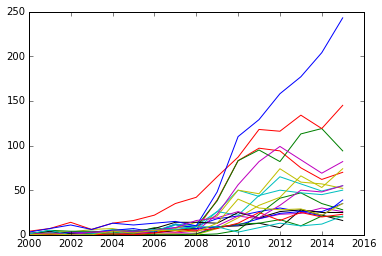

In [5]:
for cluster in cluster_list:
    plt.plot(data[cluster].keys(), data[cluster].values(), label=cluster)
# plt.legend()

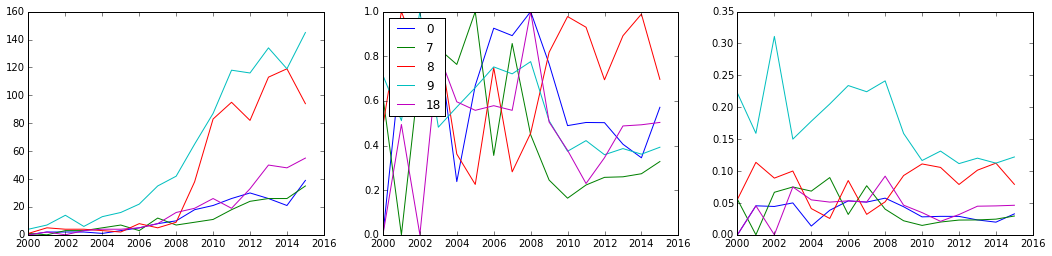

In [6]:
favorite_clusters = [0, 7, 8, 9, 18]
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
for cluster in favorite_clusters:
    plt.plot(data[cluster].keys(), data[cluster].values(), label=cluster)
# plt.legend(loc=2)


plt.subplot(1,3,2)
for cluster in favorite_clusters:
    plt.plot(data_normalized[cluster].keys(),
             [x/max(data_normalized[cluster].values()) for x in data_normalized[cluster].values()],
             label=cluster)
plt.legend(loc=2)
plt.subplot(1,3,3)
for cluster in favorite_clusters:
    plt.plot(data_normalized[cluster].keys(),
             data_normalized[cluster].values(),
             label=cluster)

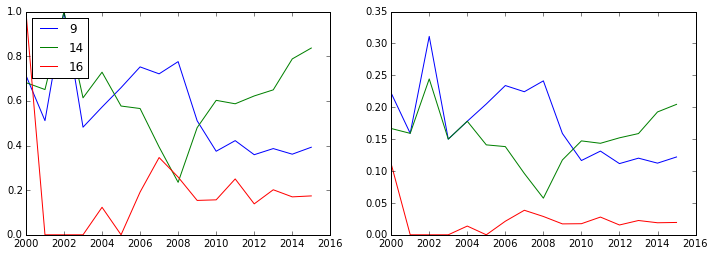

In [10]:
favorite_clusters = [9, 14, 16]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for cluster in favorite_clusters:
    plt.plot(data_normalized[cluster].keys(),
             [x/max(data_normalized[cluster].values()) for x in data_normalized[cluster].values()],
             label=cluster)
plt.legend(loc=2)
plt.subplot(1,2,2)
for cluster in favorite_clusters:
    plt.plot(data_normalized[cluster].keys(),
             data_normalized[cluster].values(),
             label=cluster)
# plt.legend(loc=2)

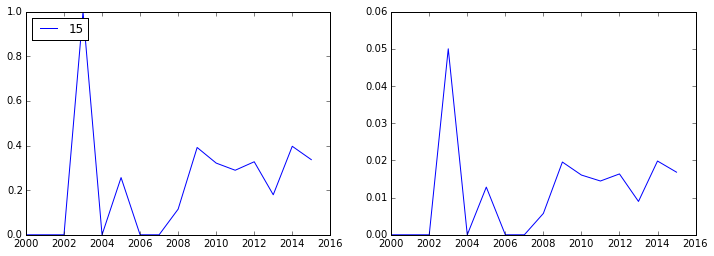

In [9]:
favorite_clusters = [15]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for cluster in favorite_clusters:
    plt.plot(data_normalized[cluster].keys(),
             [x/max(data_normalized[cluster].values()) for x in data_normalized[cluster].values()],
             label=cluster)
plt.legend(loc=2)
plt.subplot(1,2,2)
for cluster in favorite_clusters:
    plt.plot(data_normalized[cluster].keys(),
             data_normalized[cluster].values(),
             label=cluster)
# plt.legend(loc=2)